## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata,study_results, how='outer',on='Mouse ID')
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice = combined_data_df["Mouse ID"].nunique()
unique_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data_df[combined_data_df.duplicated(["Mouse ID","Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates = combined_data_df[combined_data_df.duplicated(["Mouse ID"])]
mouse_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number = clean_df["Mouse ID"].nunique()
mice_number

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = clean_df.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_variance = summary_df['Tumor Volume (mm3)'].var()
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_data = pd.DataFrame({'Mean': tumor_mean,
                             'Median': tumor_median,
                             'Varience': tumor_variance,
                             'Standard Deviation': tumor_std,
                             'SEM': tumor_sem})
summary_data

,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_data_agg = summary_df.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
summary_data_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Unique Mice/ Treatment')

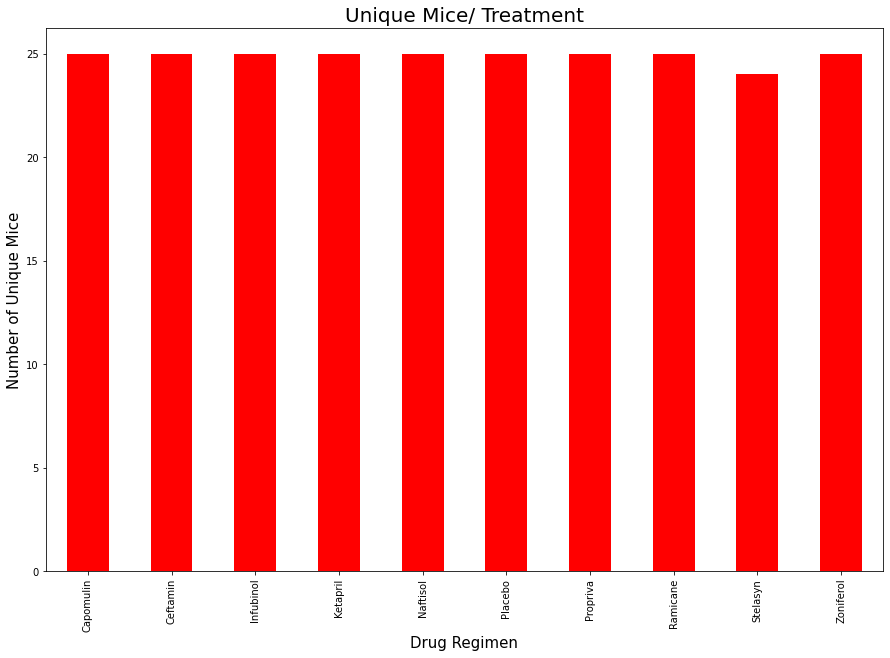

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_count_per_treatment = clean_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()
plot_pandas = mice_count_per_treatment.plot.bar(figsize=(15,10), color="red")
plt.xlabel("Drug Regimen", fontsize= 15)
plt.ylabel("Number of Unique Mice", fontsize=15)
plt.title("Unique Mice/ Treatment", fontsize=20)

(-1.0, 10.0)

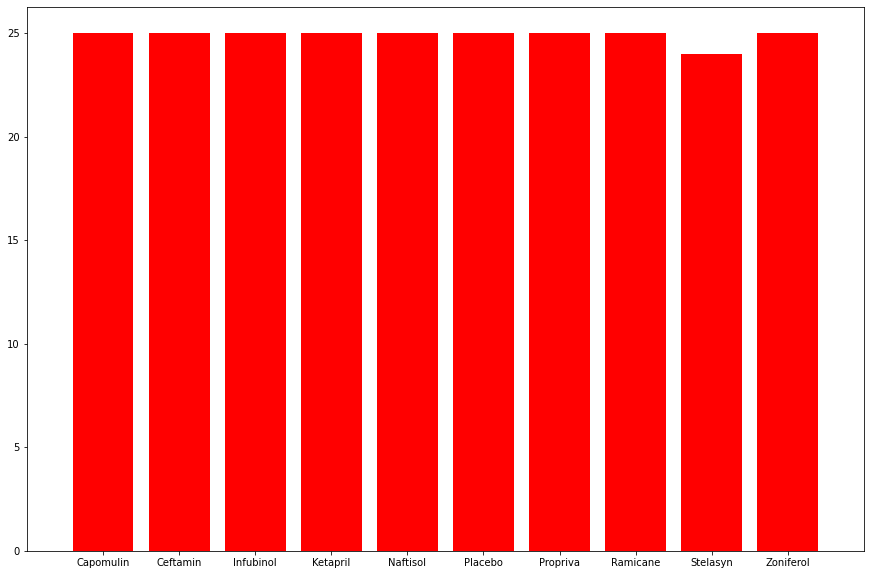

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
number_list = clean_df.groupby(["Drug Regimen"])["Mouse ID"].nunique().tolist()
number_list 
drug_list = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
drug_list
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.bar(drug_list,number_list,color="red",align="center")
plt.xlim(-1, len(drug_list))

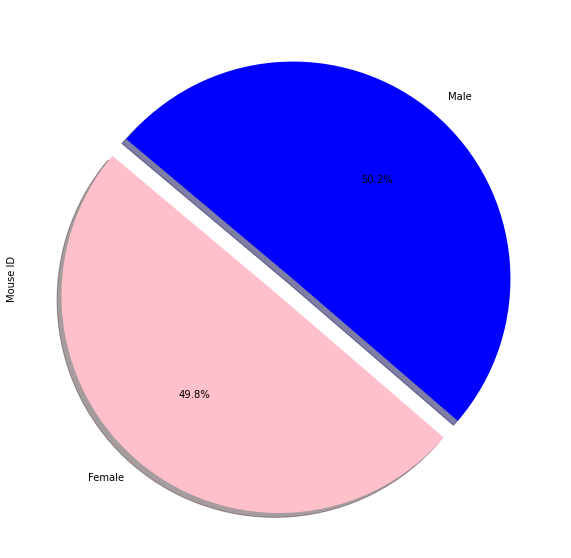

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = clean_df.groupby(["Sex"])["Mouse ID"].nunique()
gender_groups
colors = ['pink','blue']
explode = (0.1,0)
pie_plot = gender_groups.plot.pie(figsize=(15,10), colors = colors, explode = explode, shadow = True,
                                  startangle=140, autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x16ab7c2b940>,
 [Text(-0.7771287477781476, -0.9143691319028482, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.4533251028705861, -0.5333819936099948, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

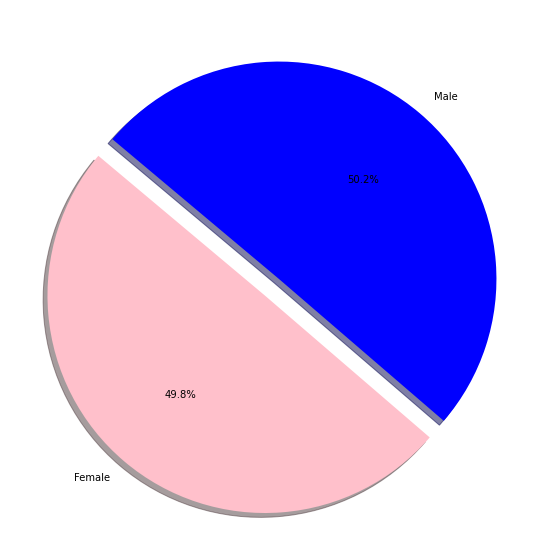

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = clean_df.groupby(["Sex"])["Mouse ID"].nunique().tolist()
gender_group
genders = ["Female","Male"]
colors = ['pink','blue']
explode = (0.1,0)

fig1, ax1 = plt.subplots(figsize=(15,10))
plt.pie(gender_group,labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, explode=explode)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
ramicane_df = clean_df[clean_df["Drug Regimen"] == "Ramicane"]
infubinol_df = clean_df[clean_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = clean_df[clean_df["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
greatest_capomulin = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
greatest_ramicane = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
greatest_infubinol = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
greatest_ceftamin = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
#Create a DataFrame for each of these
capomulin_volume = pd.DataFrame(greatest_capomulin)
ramicane_volume = pd.DataFrame(greatest_ramicane)
infubinol_volume = pd.DataFrame(greatest_infubinol)
ceftamin_volume = pd.DataFrame(greatest_ceftamin)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_volume, clean_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_merge = pd.merge(ramicane_volume, clean_df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_merge = pd.merge(infubinol_volume, clean_df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_merge = pd.merge(ceftamin_volume, clean_df, on=("Mouse ID", "Timepoint"), how="left")

In [14]:
#Capomulin info
capomulin_tumor_info = capomulin_merge["Tumor Volume (mm3)"]

quartiles = capomulin_tumor_info.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)

print(f"The lower quartile of Capomulin tumors: {lower_quartile}")
print(f"The upper quartile of Capomulin tumors: {upper_quartile}")
print(f"The median of Capomulin tumors: {quartiles[0.5]}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The median of Capomulin tumors: 38.125164399999996
The interquartile range of Capomulin tumors: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
#Ramicine info
ramicane_tumor_info = ramicane_merge["Tumor Volume (mm3)"]

quartiles = ramicane_tumor_info.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)

print(f"The lower quartile of Ramicane tumors: {lower_quartile}")
print(f"The upper quartile of Ramicane tumors: {upper_quartile}")
print(f"The median of Ramicane tumors: {quartiles[0.5]}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The median of Ramicane tumors: 36.56165229
The interquartile range of Ramicane tumors: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [16]:
#Infubinol info
infubinol_tumor_info = infubinol_merge["Tumor Volume (mm3)"]

quartiles = infubinol_tumor_info.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)

print(f"The lower quartile of Infubinol tumors: {lower_quartile}")
print(f"The upper quartile of Infubinol tumors: {upper_quartile}")
print(f"The median of Infubinol tumors: {quartiles[0.5]}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The median of Infubinol tumors: 60.16518046
The interquartile range of Infubinol tumors: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [17]:
#Ceftamin info
ceftamin_tumor_info = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumor_info.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)

print(f"The lower quartile of Ceftamin tumors: {lower_quartile}")
print(f"The upper quartile of Ceftamin tumors: {upper_quartile}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The median of Ceftamin tumors: 59.85195552
The interquartile range of Ceftamin tumors: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


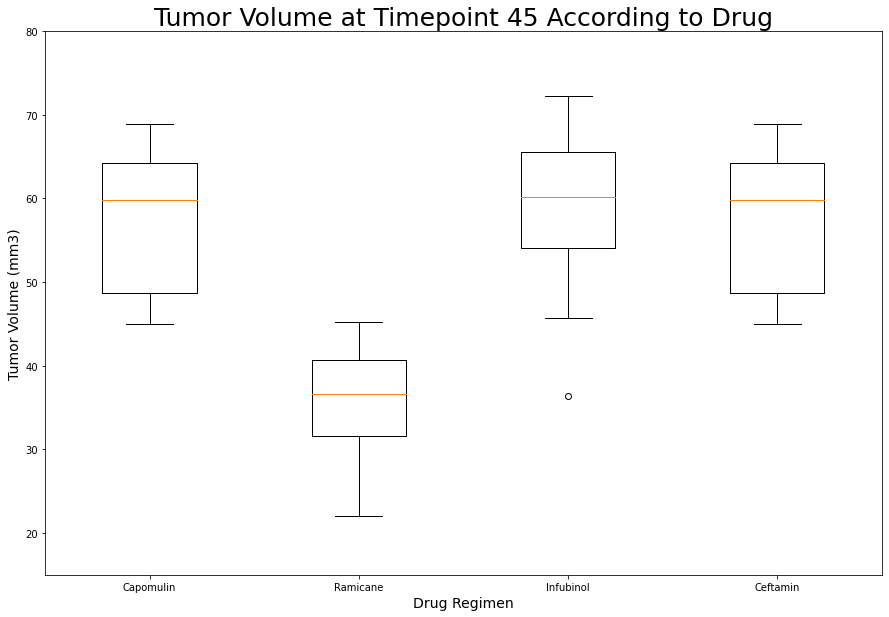

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_box = [ceftamin_tumor_info,ramicane_tumor_info,infubinol_tumor_info,ceftamin_tumor_info]
Drug = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.boxplot(data_box, labels=Drug)
ax1.set_title("Tumor Volume at Timepoint 45 According to Drug",fontsize = 25)
ax1.set_xlabel("Drug Regimen",fontsize=14)
ax1.set_ylabel("Tumor Volume (mm3)",fontsize=14)
plt.ylim(15,80)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

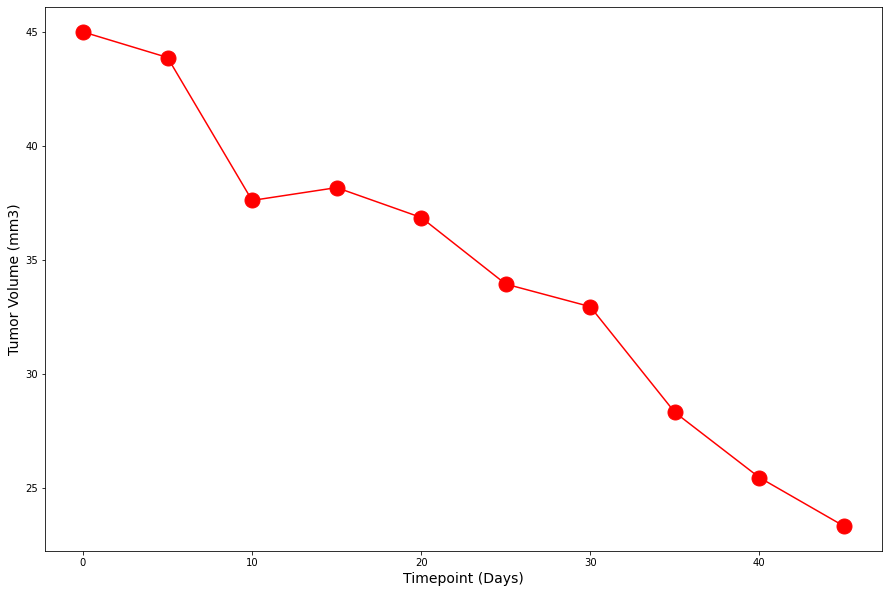

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = capomulin_df[capomulin_df["Mouse ID"] == "s185"]
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15,10))
plt.plot(x_axis,y_axis,marker="o",markersize=15,color="r")
plt.xlabel("Timepoint (Days)",fontsize=14)
plt.ylabel("Tumor Volume (mm3)",fontsize = 14)

Text(0, 0.5, 'Avg Tumor Volume (mm3)')

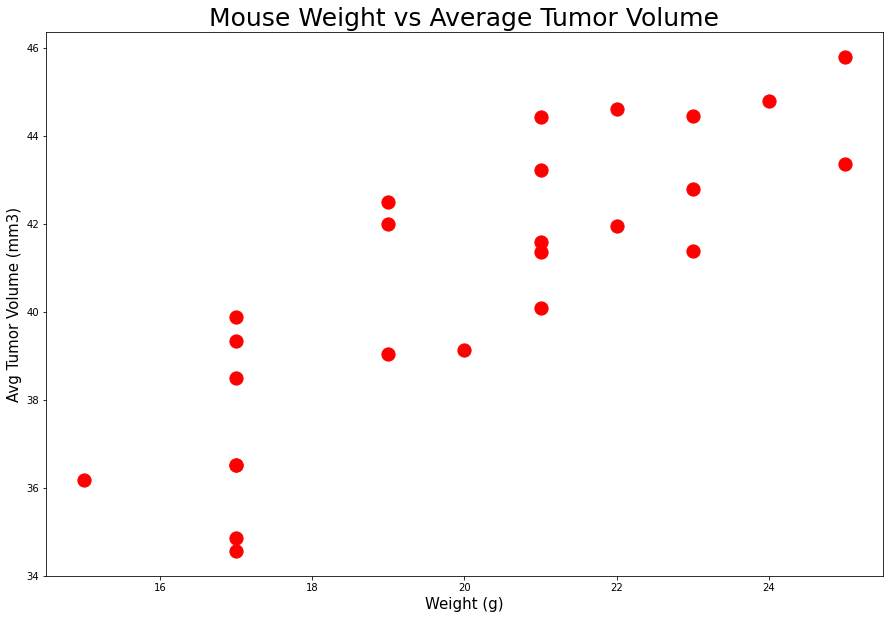

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capomulin_tumor = capomulin_df.groupby(["Mouse ID"]).mean()
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(avg_capomulin_tumor['Weight (g)'], avg_capomulin_tumor['Tumor Volume (mm3)'],color ="r",s=175)
plt.title("Mouse Weight vs Average Tumor Volume",fontsize=25)
plt.xlabel("Weight (g)",fontsize=15)
plt.ylabel("Avg Tumor Volume (mm3)",fontsize=15)

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
correlation = round(st.pearsonr(avg_capomulin_tumor['Weight (g)'],avg_capomulin_tumor['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}.")
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between mouse weight and average tumor volume is 0.84.


Text(0, 0.5, 'Avg Tumor Volume (mm3)')

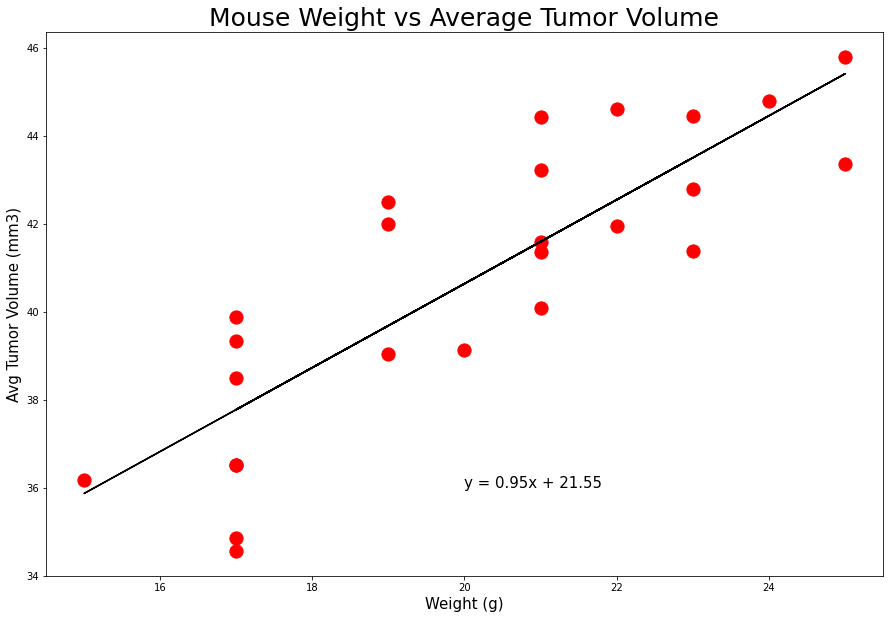

In [47]:
x_value = avg_capomulin_tumor['Weight (g)']
y_value = avg_capomulin_tumor['Tumor Volume (mm3)']

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eg = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_value,y_value, s=175,color="r")
plt.plot(x_value, regression_value, "r-",color = "black")
plt.annotate(line_eg,(20,36),fontsize=15, color="black")
plt.title("Mouse Weight vs Average Tumor Volume",fontsize=25)
plt.xlabel("Weight (g)",fontsize=15)
plt.ylabel("Avg Tumor Volume (mm3)",fontsize=15)